In [ ]:
# 1. DATA IMPORTATION AND VALIDATION.
# import necessary libraries.

In [1]:
import sqlite3 as sql
import pandas as pd

In [ ]:
#Connect to the SQLite database

In [2]:
conn = sql.connect('pharm_data.db')

In [ ]:
#Load data from the SQL table into a Pandas DataFrame

In [5]:
query = "select * from Pharm_sales"
df = pd.read_sql_query(query, conn)

In [ ]:
# Check the first few rows of the Data

In [6]:
print(df.head())

            Distributor                         Customer Name     City  \
0  Gottlieb-Cruickshank                Zieme, Doyle and Kunze   Lublin   
1  Gottlieb-Cruickshank                             Feest PLC  ?wiecie   
2  Gottlieb-Cruickshank  Medhurst-Beer Pharmaceutical Limited   Rybnik   
3  Gottlieb-Cruickshank                 Barton Ltd Pharma Plc  Czelad?   
4  Gottlieb-Cruickshank                  Keeling LLC Pharmacy  Olsztyn   

  Country  Latitude  Longitude   Channel  Sub-channel            Product Name  \
0  Poland   51.2333    22.5667  Hospital      Private              Topipizole   
1  Poland   53.4167    18.4333  Pharmacy       Retail            Choriotrisin   
2  Poland   50.0833    18.5000  Pharmacy  Institution               Acantaine   
3  Poland   50.3333    19.0833  Hospital      Private    Lioletine Refliruvax   
4  Poland   53.7800    20.4942  Pharmacy       Retail  Oxymotroban Fexoformin   

      Product Class  Quantity  Price   Sales    Month  Year Name of 

In [ ]:
#Check for missing values

In [9]:
print(df.isnull().sum())

Distributor          0
Customer Name        0
City                 0
Country              0
Latitude             0
Longitude            0
Channel              0
Sub-channel          0
Product Name         0
Product Class        0
Quantity             0
Price                0
Sales                0
Month                0
Year                 0
Name of Sales Rep    0
Manager              0
Sales Team           0
dtype: int64


In [ ]:
# Validate data types

In [11]:
print(df.dtypes)

Distributor           object
Customer Name         object
City                  object
Country               object
Latitude             float64
Longitude            float64
Channel               object
Sub-channel           object
Product Name          object
Product Class         object
Quantity             float64
Price                float64
Sales                float64
Month                 object
Year                   int64
Name of Sales Rep     object
Manager               object
Sales Team            object
dtype: object


In [ ]:
#Convert the 'Quantity' column from 'float64' to 'int64'

In [13]:
df['Quantity']= df['Quantity'].round().astype('int64')

In [ ]:
#Verify datatype change

In [15]:
print(df['Quantity'].dtype)

int64


In [ ]:
#Drop duplicates if any

In [17]:
df.drop_duplicates(inplace=True)

In [ ]:
# check for duplicates

In [19]:
print(df.duplicated().sum())

0


In [ ]:
# Search for negative values in sales and quantity columns

In [23]:
invalid_values= df[(df['Sales'] < 0)| (df['Price'] > 0)]

In [25]:
print(invalid_values)

                 Distributor                               Customer Name  \
0       Gottlieb-Cruickshank                      Zieme, Doyle and Kunze   
1       Gottlieb-Cruickshank                                   Feest PLC   
2       Gottlieb-Cruickshank        Medhurst-Beer Pharmaceutical Limited   
3       Gottlieb-Cruickshank                       Barton Ltd Pharma Plc   
4       Gottlieb-Cruickshank                        Keeling LLC Pharmacy   
...                      ...                                         ...   
254077    Bashirian-Kassulke  Koch, Borer and Hagenes Pharmaceutical Ltd   
254078    Bashirian-Kassulke                 Hane Ltd Pharmaceutical Ltd   
254079    Bashirian-Kassulke                      Harris-Conroy Pharmacy   
254080    Bashirian-Kassulke                      Balistreri Group Pharm   
254081    Bashirian-Kassulke               Heathcote, Kovacek and Parker   

                 City  Country  Latitude  Longitude   Channel  Sub-channel  \
0        

In [ ]:
# Use abs() to convert negative values to positive values

In [27]:
df['Quantity'] = df['Quantity'].abs()
df['Sales'] = df['Sales'].abs()

In [ ]:
# Confirm all values in the corrected columns are now positive

In [29]:
print(df[df['Quantity'] < 0 ])
print(df[df['Sales'] <0])

Empty DataFrame
Columns: [Distributor, Customer Name, City, Country, Latitude, Longitude, Channel, Sub-channel, Product Name, Product Class, Quantity, Price, Sales, Month, Year, Name of Sales Rep, Manager, Sales Team]
Index: []
Empty DataFrame
Columns: [Distributor, Customer Name, City, Country, Latitude, Longitude, Channel, Sub-channel, Product Name, Product Class, Quantity, Price, Sales, Month, Year, Name of Sales Rep, Manager, Sales Team]
Index: []


In [ ]:
# 2. EXPLORATORY DATA ANALYSIS(EDA)
# Use describe() to get summary statistics

In [31]:
print(df.describe())

            Latitude      Longitude       Quantity          Price  \
count  254078.000000  254078.000000  254078.000000  254078.000000   
mean       50.962216      10.803216     115.687316     412.210510   
std         1.625536       4.143295     743.884021     224.963357   
min        47.514200       6.083800       0.000000      22.000000   
25%        49.805600       7.891100       5.000000     195.000000   
50%        51.133300       9.397800      20.000000     430.000000   
75%        52.083300      12.133300      50.000000     605.000000   
max        54.781900      23.566700  117600.000000     794.000000   

              Sales           Year  
count  2.540780e+05  254078.000000  
mean   4.759144e+04    2018.385193  
std    3.490393e+05       1.041356  
min    0.000000e+00    2017.000000  
25%    1.800000e+03    2018.000000  
50%    6.040000e+03    2018.000000  
75%    2.225000e+04    2019.000000  
max    7.420560e+07    2020.000000  


In [ ]:
# Visualizations: Use matplotlib and seaborn to plot data distributions, outliers and relationships

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Plot Sales Distributions

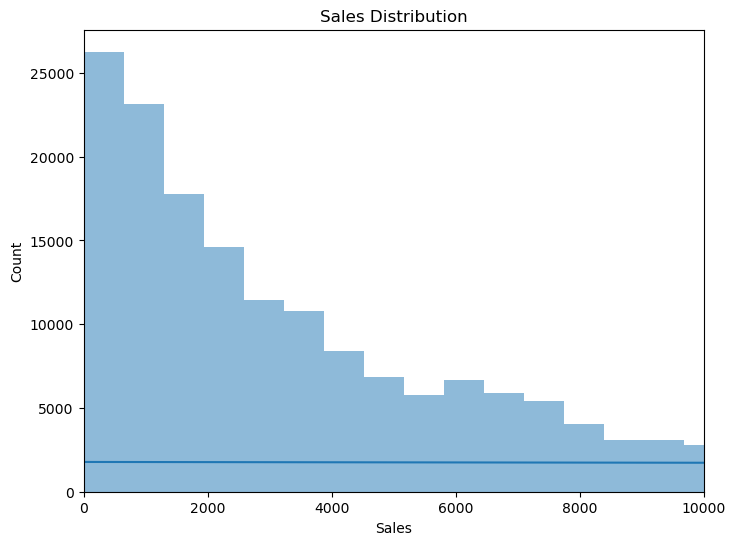

In [57]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Sales'], kde=True)
plt.title('Sales Distribution')
plt.xlim(0, 10000)  
plt.show()


In [ ]:
# Key Observations:
# 1. Sales Frequency:Most sales values are concentrated in the lower range (0–2000). The first bar has the highest count, indicating that small sales transactions are the most common.
#As the sales values increase, the frequency drops significantly, showing that high sales values are less common.
# 2. Skewness:The distribution is right-skewed, meaning most of the data is clustered at the lower end, with a long tail extending toward higher sales values.
# 3. Range: The sales values span from 0 to around 10,000, with fewer instances in the higher ranges.
#Insights: 
# 1. Majority of Transactions: Small sales dominate, potentially indicating either low-value items or a higher frequency of smaller transactions.
# 2. Rare High Sales: Larger sales are relatively rare, which could suggest high-value items are sold less frequently or to a niche segment of customers.
# Potential Actions:Investigate what drives the high sales values. Are they linked to specific products, customer types, or territories? Consider strategies to increase the average sales value or encourage more frequent high-value transactions.


In [ ]:
# Boxplot to check for outliers in product prices

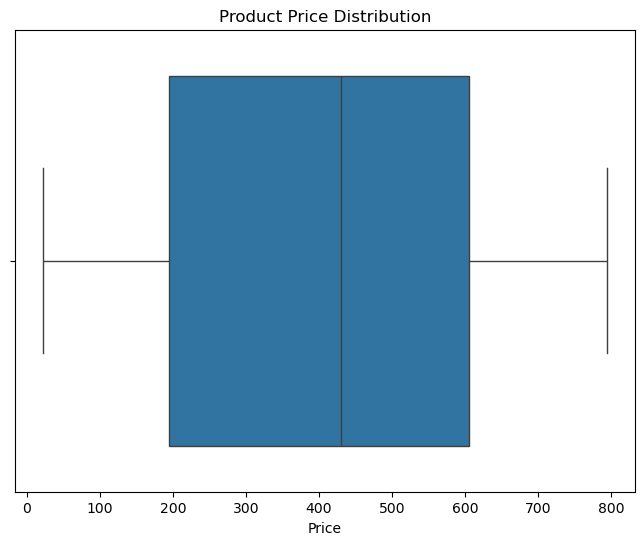

In [38]:
plt.figure(figsize=(8, 6))
sns.boxplot(x = df['Price'])
plt.title('Product Price Distribution')
plt.show()

In [ ]:
#This boxplot visualizes the distribution of product prices. Here's the interpretation:

# 1. Median:The thick line inside the box represents the median price, which appears to be around 450. This indicates that half of the products have prices below this value, and half are above it.

# 2. Interquartile Range (IQR):The box represents the middle 50% of the data (from the 25th percentile to the 75th percentile). The lower edge of the box (~300) indicates the 25th percentile, and the upper edge (~600) indicates the 75th percentile.

# 3. Whiskers:The lines extending from the box (whiskers) show the range of prices that are within 1.5 times the IQR from the 25th and 75th percentiles. The minimum price is approximately 50, and the maximum price is close to 750.

# 4. Outliers:There appear to be no points outside the whiskers, suggesting that there are no significant outliers in this dataset.

# 5. Symmetry: The box is roughly symmetric around the median, suggesting that the price distribution is fairly balanced, with no strong skewness.
# Key Insights: Most product prices fall between 300 and 600, with no extreme values. The price range (~50 to ~750) suggests a broad variety of pricing across the products.
 # The central concentration around the median price (~450) indicates pricing consistency for a significant portion of products.

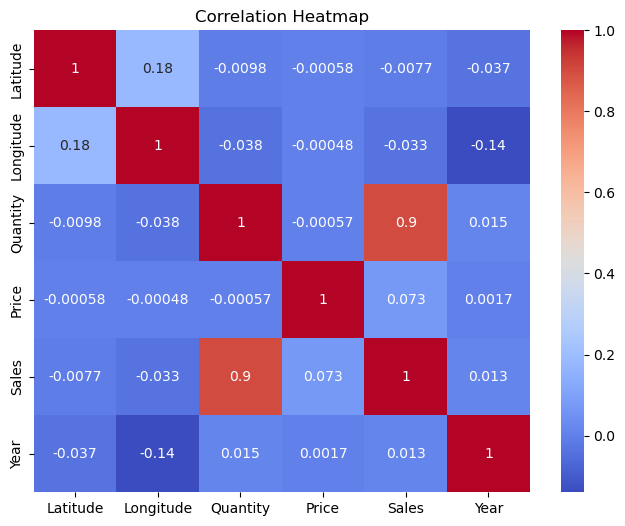

In [41]:
plt.figure(figsize= (8, 6))
numeric_df = df.select_dtypes(include = ['number'])
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#This heatmap visually represents the correlation coefficients between different variables. Here is the interpretation:

# 1. Correlation Range:Values range from -1 to 1.
#     1 indicates a perfect positive correlation (as one variable increases, the other increases).
#    -1 indicates a perfect negative correlation (as one variable increases, the other decreases).
#     0 indicates no correlation.
#Key Observations:

# 1. Quantity and Sales: There is a strong positive correlation (~0.9). This means that as the quantity sold increases, the total sales value also increases significantly, which is expected.
# 2. Latitude and Longitude: A small positive correlation (~0.18) suggests some relationship but not very strong.
# 3. Price and Sales/Quantity: Minimal positive correlation between price and sales (~0.073) or price and quantity (-0.00057), indicating that price doesn't strongly affect these variables.
# 4. Year and other variables: Almost no correlation with any other variable, implying time (year) might not significantly influence these data points.
# 5. Latitude and other metrics: Latitude shows very weak correlations with sales, price, and quantity, suggesting location (in terms of latitude) doesn't heavily impact these metrics.
#Diagonal Elements:

#Always 1 because they represent a variable's correlation with itself.
# summary, the most notable relationship is between Quantity and Sales, while other variables show weak or negligible correlations

In [ ]:
# 3. SALES DATA ANALYSIS BY YEAR, PRODUCT AND REGION
#    Group data by year, and plot line graph for visualization

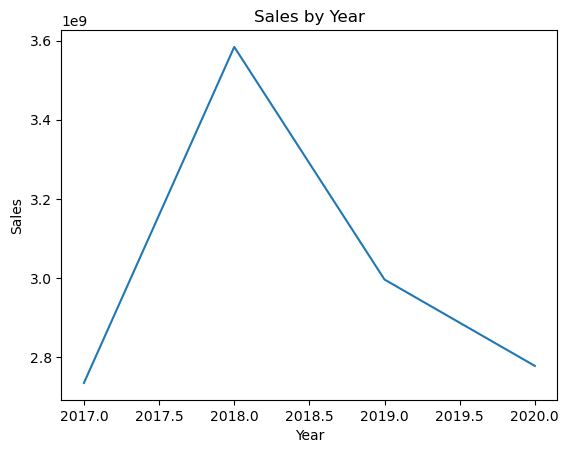

In [45]:
sales_by_year = df.groupby('Year')['Sales'].sum().reset_index()
sns.lineplot(data= sales_by_year, x ='Year', y='Sales')
plt.title('Sales by Year')
plt.show()

In [ ]:
#  Visualization shows 2018 as the year with the most sales... 

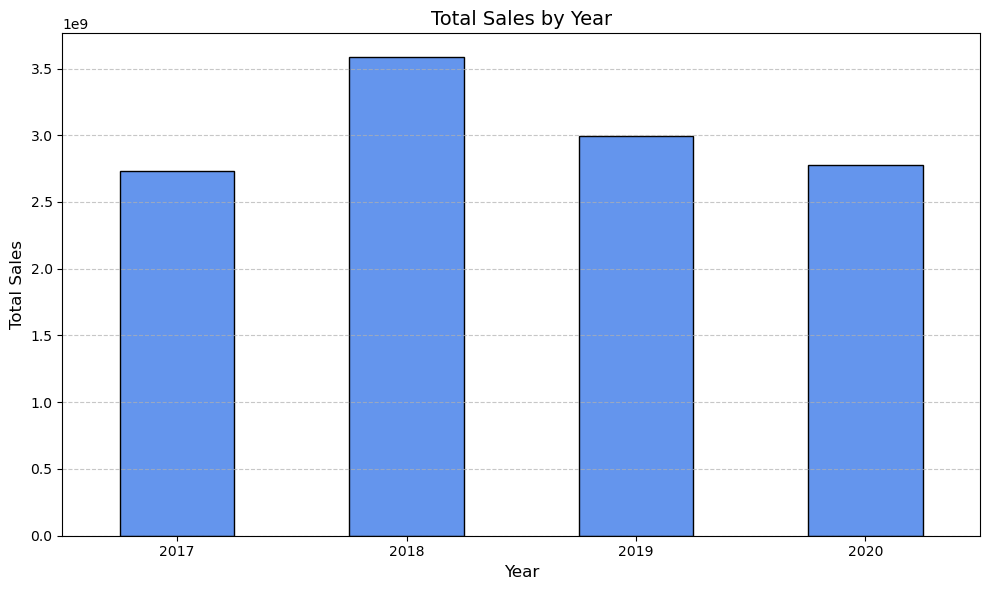

In [65]:
sales_by_year = df.groupby('Year')['Sales'].sum()
sales_by_year.plot(kind='bar', figsize=(10, 6), color='cornflowerblue', edgecolor='black')
plt.xlabel('Year', fontsize=12) 
plt.ylabel('Total Sales', fontsize=12)  
plt.title('Total Sales by Year', fontsize=14) 
plt.xticks(rotation=0, fontsize=10)  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
# Bar chart visualization showing 2018 as the most prolific year for sales

In [ ]:
# Analysing sales by product class

In [51]:
sales_by_productclass = df.groupby('Product Class')['Sales'].sum()

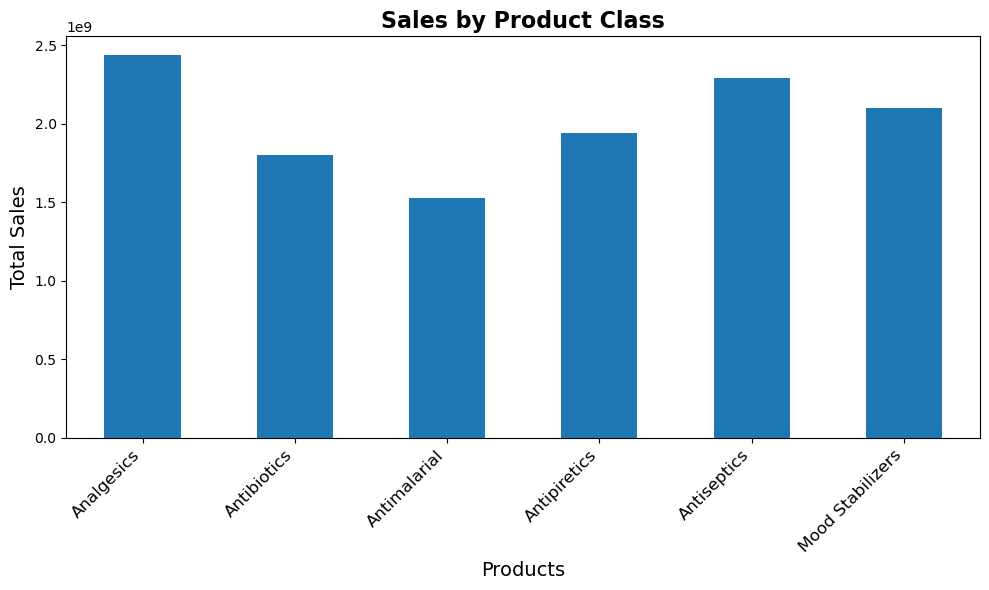

In [63]:
plt.figure(figsize=(10, 6))  
sales_by_productclass.plot(kind='bar')
plt.title('Sales by Product Class', fontsize=16, fontweight='bold')
plt.xlabel('Products', fontsize=14)  
plt.ylabel('Total Sales', fontsize=14) 


plt.xticks(rotation=45, ha='right', fontsize=12)

plt.tight_layout()


In [ ]:
# Above plot shows the total sales based on product class. Analgesics have the highest sales.

In [ ]:
# Group sales by product name

In [79]:
sales_by_product = df.groupby('Product Name')['Sales'].sum()

In [81]:
print(sales_by_product)

Product Name
Abatatriptan             79992052.0
Abilovir Aprotasol       35798089.6
Abobozolid                7680900.0
Abranatal Lysoprosate    86937822.0
Abtasol                  89645322.0
                            ...    
Zithrotrol               14619955.0
Zonitonin                51403730.0
Zonixamine Immulinum     50689204.0
Zynosine                  7873822.0
Zyvance                  56200708.0
Name: Sales, Length: 240, dtype: float64


In [ ]:
# Group sales by country.

In [107]:
sales_by_country = df.groupby('Country')['Sales'].sum().reset_index()


In [ ]:
# Confirm data frame

In [103]:
print(sales_by_country)


   Country         Sales
0  Germany  1.141070e+10
1   Poland  6.812374e+08


In [ ]:
# Set index to country names

In [109]:
sales_by_country.set_index('Country', inplace = True)

In [ ]:
# Plot bar chart for Total sales vs country

<Figure size 2000x600 with 0 Axes>

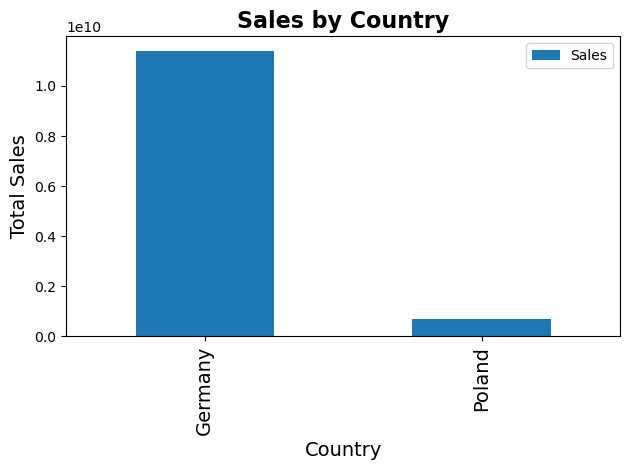

In [113]:
plt.figure(figsize=(20, 6))  
sales_by_country.plot(kind='bar')
plt.title('Sales by Country', fontsize=16, fontweight='bold')
plt.xlabel('Country', fontsize=14)  
plt.ylabel('Total Sales', fontsize=14) 


plt.xticks( fontsize=14)

plt.tight_layout()


In [ ]:
# Plot shows Germany having significantly higher sales than Poland

In [153]:
customer_demographics = df.groupby('Sub-channel')['Sales'].mean()

C:\Users\Okorigwe Clinton\AppData\Local\Temp\ipykernel_6012\2245080014.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sub-channel', y='Sales', data=df, palette='Set2')


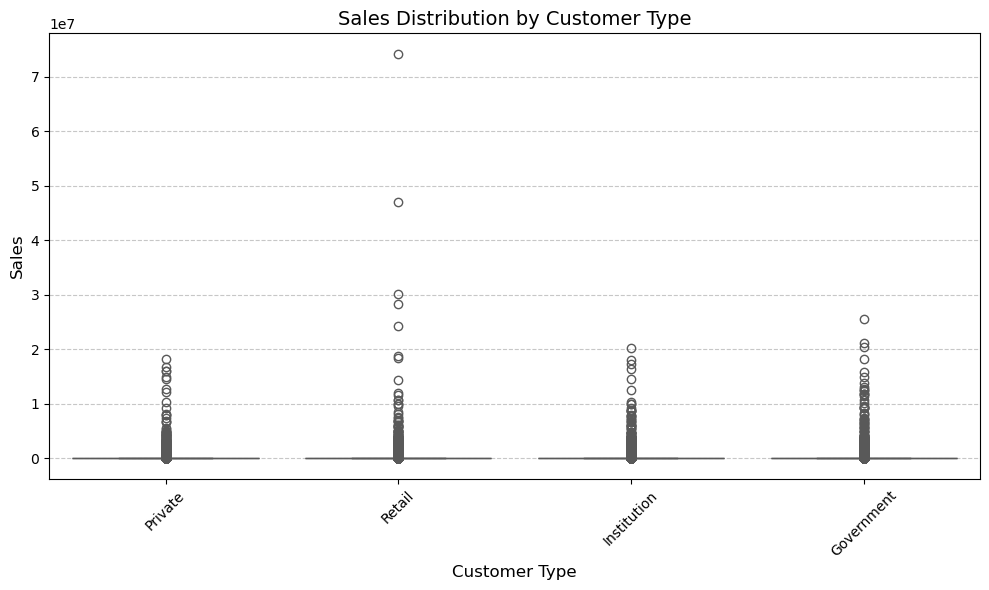

In [159]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sub-channel', y='Sales', data=df, palette='Set2')
plt.xlabel('Customer Type', fontsize=12)  
plt.ylabel('Sales', fontsize=12)          
plt.title('Sales Distribution by Customer Type', fontsize=14) 
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\Okorigwe Clinton\AppData\Local\Temp\ipykernel_6012\2627634788.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sub-channel', y='Sales', data=df, palette='Set2', ci=None)  # Bar plot instead of boxplot
C:\Users\Okorigwe Clinton\AppData\Local\Temp\ipykernel_6012\2627634788.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sub-channel', y='Sales', data=df, palette='Set2', ci=None)  # Bar plot instead of boxplot


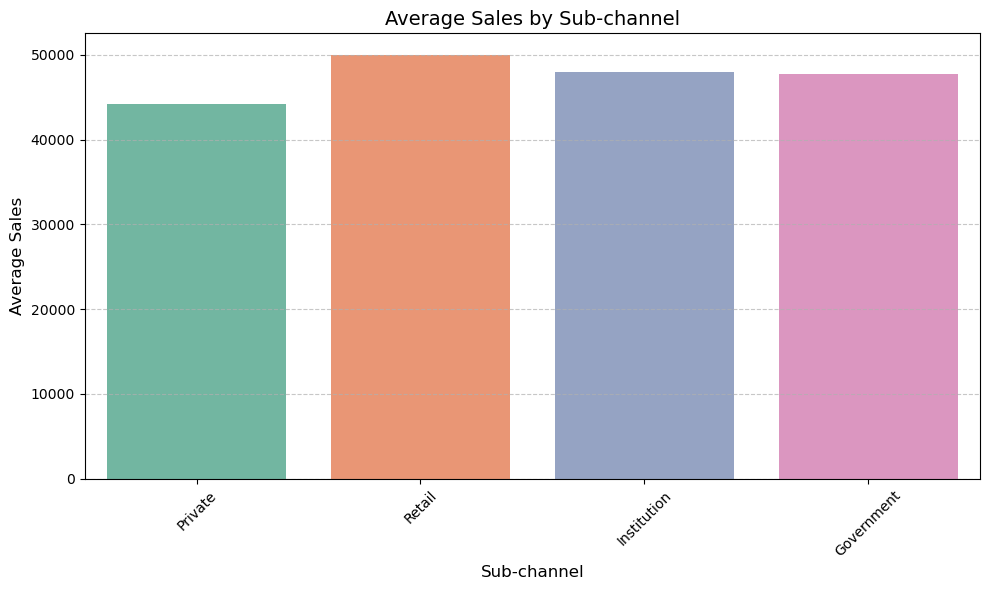

In [131]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Sub-channel', y='Sales', data=df, palette='Set2', ci=None)  # Bar plot instead of boxplot
plt.xlabel('Sub-channel', fontsize=12)  # X-axis label
plt.ylabel('Average Sales', fontsize=12)  # Y-axis label
plt.title('Average Sales by Sub-channel', fontsize=14)  # Title
plt.xticks(rotation=45, fontsize=10)  # Rotate x-axis labels if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Optional: Add horizontal gridlines
plt.tight_layout()  # Prevent clipping
plt.show()


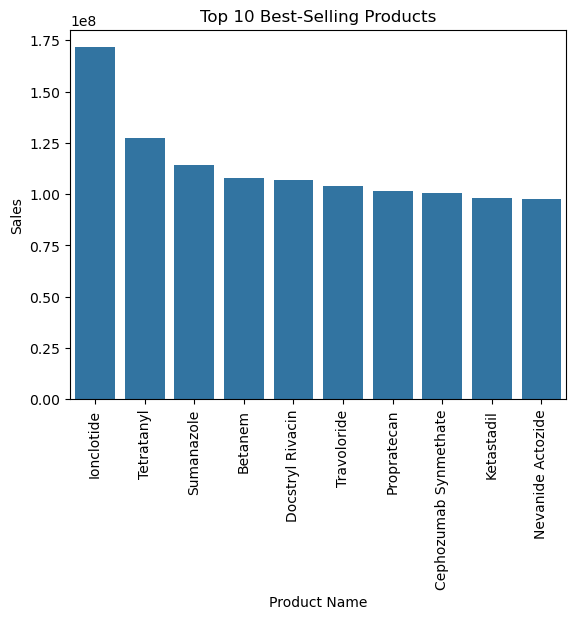

In [137]:
# Group by product and sum sales
sales_by_product = df.groupby('Product Name')['Sales'].sum().reset_index()
top_products = sales_by_product.sort_values(by='Sales', ascending=False).head(10)

sns.barplot(data=top_products, x='Product Name', y='Sales')
plt.title('Top 10 Best-Selling Products')
plt.xticks(rotation=90)
plt.show()


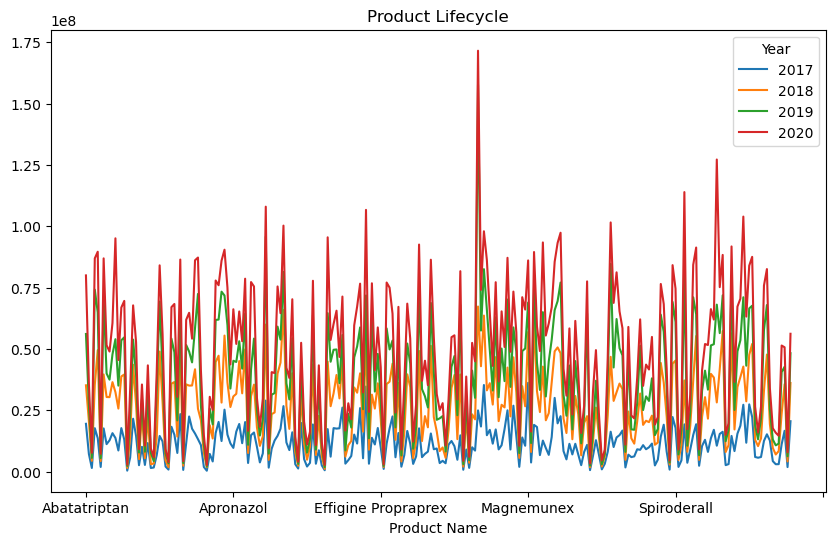

In [147]:
product_lifecycle = df.groupby(['Product Name', 'Year'])['Sales'].sum().unstack()
product_lifecycle.plot(kind='line', stacked = True, figsize =(10,6))
plt.title('Product Lifecycle')
plt.show()


In [151]:
average_price = df.groupby('Product Name')['Price'].mean()
print(average_price)

Product Name
Abatatriptan             742.0
Abilovir Aprotasol       269.0
Abobozolid                75.0
Abranatal Lysoprosate    681.0
Abtasol                  754.0
                         ...  
Zithrotrol               137.0
Zonitonin                518.0
Zonixamine Immulinum     298.0
Zynosine                  74.0
Zyvance                  323.0
Name: Price, Length: 240, dtype: float64


In [161]:
conn.commit()

In [163]:
conn.close()